# BIOS 823

- The time allocated is 2 hours
- This is a **closed book** examination
    - Close ALL applications on your laptop
    - Start an empty browser with a SINGLE Tab in FULL SCREEN MODE
    - You should only have this SINGLE notebook page open in your browser, with NO OTHER TABS or WINDOWS
- You are not allowed any reference material except for the following:
    - Cheat sheet (1 letter-sized paper, both sides)
    - Built-in help accessible either by `?foo`, `foo?` or `help(foo)`
- ALL necessary imports of Python modules have been done for you. 
- **You should not import any additional modules - this includes standard library packages**.

Note that answers will be graded on **correctness**, **efficiency** and **readability**.

<font color=blue>By taking this exam, you acknowledge that you have read the instructions and agree to abide by the Duke Honor Code.</font>

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1**. (10 points)

Warm up exercise.

Find the 5 most common words and their counts in `data/moby.txt`, after removing punctuation, setting to lowercase and splitting by blank space.

In [3]:
import string

In [4]:
# Read in data and split by blank spaces
moby = pd.read_csv('data/moby.txt', sep=" ", header=None)
moby.head()


,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,200,201,202,203
0,Call,me,Ishmael.,Some,years,ago,—,never,mind,how,...,very,nearly,the,same,feelings,towards,the,ocean,with,me.


In [5]:
# Transpose the matrix to get a single columns of words
moby = moby.T
# Rename the column to something more meaningful
moby = moby.rename(columns = {0: 'Words'})
moby.head()

,Words
0,Call
1,me
2,Ishmael.
3,Some
4,years


In [6]:
# Remove punctuation using Regex

moby['Words'] = moby['Words'].str.replace('[^\w\s]','')

# Convert words to lowercase
moby['Words'] = moby['Words'].str.lower()

# Look at new dataframe
moby.head()

,Words
0,call
1,me
2,ishmael
3,some
4,years


In [7]:
# Find the 5 most common words using value_counts and indexing

moby['Words'].value_counts()[:5]

the    10
i       9
and     7
me      5
to      5
Name: Words, dtype: int64

**2**. (10 points)

- Assemble the data from `features`, `subjects`, `X`, and `y` into a single `pandas.DataFrame (DF)` called `har`.  You should end up with a DF that is 7352 by 562 with `activity` as the first column. Rows and columns should be appropriately labeled.
    - `X` is a matrix where each row is a feature matrix
    - The columns of X are given in `features`
    - Each row of X is a subject given in `subjects`
    - `y` is a code for the type of activity performed by the subject (name the column in the DataFrame `actvitity`)
- Name the index `subject`
- Display a sample of 5 rows chosen at random without replacement and the first 5 columns.

In [73]:
activities = np.loadtxt('data/HAR/activity_labels.txt', dtype='str')
features = np.loadtxt('data/HAR/features.txt', dtype='str')[:, 1]
subjects = np.loadtxt('data/HAR/train/subject_train.txt', dtype='int')
X = np.loadtxt('data/HAR/train/X_train.txt')
y = np.loadtxt('data/HAR/train/y_train.txt', dtype='int')

In [89]:
# Create dictionary of activities 
activity_dict = {item[0]: item[1] for item in activities}
activity_dict

# Create new list of activites changed from number to words
activity_name = [activity_dict[str(i)] for i in y]
activity_name

['STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'WALKING',
 'WALKING',
 'WALKING',
 'WALKING',
 'WALKING',
 'WA

In [74]:
# Start by putting the x values into the matrix and adding the feature names
har = pd.DataFrame(X)
har.columns = features
har.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [75]:
# Add a column for activity and activity code
har.insert(0, 'activity', y)
har.head()

,activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,5,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,5,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,5,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,5,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,5,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [13]:
# Change the index name to be subject
har.index.name = 'subject'
har.index.name

'subject'

In [14]:
# Display first 5 rows
har.head()

,activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
subject,,,,,,,,,,,,,,,,,,,,,
0,STANDING,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,STANDING,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,STANDING,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,STANDING,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,STANDING,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [34]:
# Display 5 randomly-chosen rows 
har.sample(5)

,activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
subject,,,,,,,,,,,,,,,,,,,,,
3581,WALKING_UPSTAIRS,0.185029,-0.034130,-0.103756,-0.099499,0.009996,-0.438423,-0.187697,-0.031720,-0.460007,...,0.106663,-0.509876,-0.810049,0.538602,0.899623,0.946499,0.945631,-0.653336,0.306202,0.137872
4061,LAYING,0.268996,-0.018746,-0.104840,-0.976676,-0.982813,-0.960828,-0.976899,-0.981442,-0.955567,...,0.427382,-0.578774,-0.833048,0.050784,0.170075,0.126804,0.015395,0.331426,-0.389987,-0.574056
6405,WALKING_DOWNSTAIRS,0.212469,-0.054977,-0.077958,0.014498,-0.028899,-0.421830,0.015739,-0.067850,-0.441884,...,0.228833,-0.177604,-0.596403,0.275496,0.902997,-0.925653,0.048413,-0.775513,0.227977,0.105629
5675,STANDING,0.279501,-0.016248,-0.105784,-0.996713,-0.966544,-0.939607,-0.996878,-0.965573,-0.938901,...,0.241810,-0.527902,-0.843062,-0.246789,0.120424,-0.346509,0.340688,-0.873252,0.172850,-0.030219
5789,WALKING,0.304918,0.011457,-0.075635,-0.440608,-0.244666,-0.381005,-0.459726,-0.308061,-0.400518,...,0.106791,0.121030,-0.248896,-0.161063,-0.358301,0.797780,0.633783,-0.845566,0.176327,-0.058201


**3**. (10 points)

Using the DF from Question 1, find the average feature value for each subject for all features that have the string `entropy` in it but does NOT end in X, Y or Z. Use method chaining to perform this operation and show a random sample of 5 rows without replacement as a single expression.

In [41]:
# Come back to this to figure out the method chaining portion of the problem
filtered = har.filter(like = 'entropy', axis = 1) # Obtain the columns that have entropy in them
filtered = filtered.drop(columns = filtered.columns[(filtered.columns.str.endswith(('X', 'Y', 'Z')))]) # Get rid of the columns with X,Y,Z
filtered.sample(5)

,tBodyAccMag-entropy(),tGravityAccMag-entropy(),tBodyAccJerkMag-entropy(),tBodyGyroMag-entropy(),tBodyGyroJerkMag-entropy(),fBodyAccMag-entropy(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroJerkMag-entropy()
subject,,,,,,,,,
3595,0.809762,0.809762,0.730801,0.835217,0.817526,0.582675,0.215336,0.552466,0.255342
3425,0.887585,0.887585,0.698953,0.700455,0.870759,0.639585,0.345866,0.530251,0.317994
4401,-0.300062,-0.300062,-0.673497,0.372905,-0.310078,-0.739177,-1.000000,-0.421001,-0.668667
901,-0.690984,-0.690984,-0.784761,-0.198314,-0.615563,-0.946182,-1.000000,-0.787033,-0.955696
6019,0.862863,0.862863,0.769544,0.604129,0.815748,0.558755,0.350765,0.555956,0.253222


**4**. (10 points)

Write an SQL query against the `har` table to count the number of distinct subjects and the total number of rows for each activity, ordering the results by number of rows for each activity in decreasing order. A simple example of how to run an SQL query using `pandas` is provided.

In [45]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/har.db', echo=False)

In [46]:
query = '''
SELECT subject, activity 
FROM har 
LIMIT 5
'''
pd.read_sql(query, con=engine)

OperationalError: (sqlite3.OperationalError) no such table: har
[SQL: 
SELECT subject, activity 
FROM har 
LIMIT 5
]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [42]:
problem_query = '''
SELECT DISTINCT(subject), COUNT(*)
FROM har
GROUP BY activity
ORDER BY COUNT(*) DESC


'''

pd.read_sql(problem_query, con = engine)

**5**. (25 points)

- Create a new DF `df` from the `har` DF with all features that include the string `Acc-mean`
- Scale the feature columns so that all features have mean 0 and standard deviation 1
- Use SVD to find the first two principal components
- Plot the first two principal components as a scatter plot colored by the `activity` type of each feature vector
- Plot the 2D t-SNE plot colored in the same way (t-SNE dimension reduction may take 1-2 minutes)

Do not import any other packages apart from the cell below.

In [52]:
from scipy.linalg import svd
from sklearn.manifold import TSNE

In [48]:
# Select the features with Acc-mean
acc_har = har.filter(like = 'Acc-mean', axis = 1)

acc_har.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,fBodyAcc-mean()-X,fBodyAcc-mean()-Y,fBodyAcc-mean()-Z,fBodyAcc-meanFreq()-X,fBodyAcc-meanFreq()-Y,fBodyAcc-meanFreq()-Z
subject,,,,,,,,,,,,
0,0.288585,-0.020294,-0.132905,0.963396,-0.140840,0.115375,-0.994783,-0.982984,-0.939269,0.252483,0.131836,-0.052050
1,0.278419,-0.016411,-0.123520,0.966561,-0.141551,0.109379,-0.997451,-0.976852,-0.973523,0.271309,0.042864,-0.014310
2,0.279653,-0.019467,-0.113462,0.966878,-0.142010,0.101884,-0.993594,-0.972511,-0.983304,0.124531,-0.064611,0.082677
3,0.279174,-0.026201,-0.123283,0.967615,-0.143976,0.099850,-0.995491,-0.983570,-0.991080,0.029044,0.080302,0.185695
4,0.276629,-0.016570,-0.115362,0.968224,-0.148750,0.094486,-0.997286,-0.982301,-0.988369,0.181090,0.057988,0.559786


In [50]:
# Normalize all the data
acc_har = (acc_har - acc_har.mean())/(acc_har.std())
acc_har.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,fBodyAcc-mean()-X,fBodyAcc-mean()-Y,fBodyAcc-mean()-Z,fBodyAcc-meanFreq()-X,fBodyAcc-meanFreq()-Y,fBodyAcc-meanFreq()-Z
subject,,,,,,,,,,,,
0,0.200628,-0.063678,-0.419600,0.579132,-0.407927,0.061688,-0.869179,-0.917827,-0.753424,1.812459,0.493123,-0.336709
1,0.055944,0.031484,-0.253891,0.585257,-0.409839,0.044448,-0.875408,-0.905150,-0.845981,1.883573,0.122044,-0.206196
2,0.073510,-0.043414,-0.076289,0.585870,-0.411071,0.022898,-0.866402,-0.896177,-0.872411,1.329126,-0.326202,0.129201
3,0.066691,-0.208407,-0.249695,0.587297,-0.416354,0.017050,-0.870831,-0.919038,-0.893421,0.968427,0.278191,0.485454
4,0.030467,0.027585,-0.109840,0.588476,-0.429179,0.001626,-0.875023,-0.916415,-0.886098,1.542774,0.185124,1.779127


In [123]:
# Find the first two principal components with svd
u, s, v = svd(acc_har)
principal_comp1 = u[0]
principal_comp2 = u[1]

# Create dataframe for easier plotting

comp_df =pd.DataFrame({'p1': principal_comp1, 'p2':principal_comp2, 'activity': har['activity'], 'label': activity_label})

<AxesSubplot:xlabel='p1', ylabel='p2'>

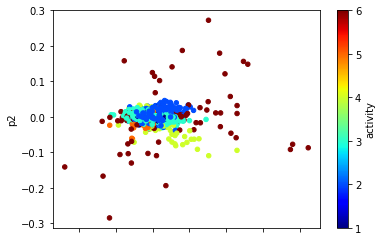

In [133]:
# Plot the principal components
comp_df.plot.scatter(x ='p1', y= 'p2', c= 'activity', colormap = 'jet')

In [151]:
# Run t-sne with 2 dimensions
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(acc_har)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.010s...
[t-SNE] Computed neighbors for 7352 samples in 1.607s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.528712
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.994652
[t-SNE] KL divergence after 300 iterations: 2.496598


In [160]:
# Create dataframe of results for easier plotting
tsne_df =pd.DataFrame({'c1': tsne_results[:,0], 'c2':tsne_results[:,1], 'activity': har['activity'], 'label': activity_label})

Text(0.5, 1.0, 't-sne plot')

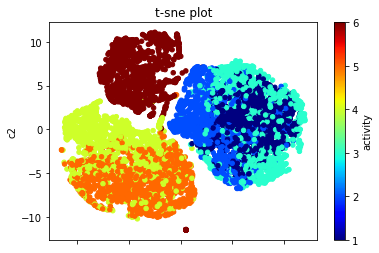

In [242]:
# Plot tsne results
tsne_df.plot.scatter(x ='c1', y= 'c2', c= 'activity', colormap = 'jet')
plt.xlabel('c1')
plt.title('t-sne plot')

In [ ]:
X_test_data = np.loadtxt('data/HAR/test/X_test.txt')
y_test_data = np.loadtxt('data/HAR/test/y_test.txt', dtype='int')
subjects_test = np.loadtxt('data/HAR/test/subject_test.txt', dtype='int')

**6**. (25 points)

You are given training and test data and labels using a subset of the HAR data set. Your job is to use these features to classify rows into WALKING UPSTAIRS (code = 2) or WALKING DOWNSTAIRS (code = 3). 

- Scale the data to have mean zero and unit standard deviation using `StandardScaler`, taking care to apply the same scaling parameters for the training and test data sets
- Use the LaeblEncoder to transform the codes 2 and 3 to 0 and 1 in `y_train` and `y_test` 
- Perform ridge regression to classify data as WALKING UPSTAIRS or WALKING DOWNSTAIRS
    - Train the model with an Cs value chosen from one of (0.01, 0.1, 1, 10, 100) by 5-fold cross-validation using the training data
    - Plot the ROC curve (TPR versus FPR) evaluated on the test data

The necessary classes from `sklearn` are imported for you. Do not use any other `sklearn` classes

In [166]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve

In [208]:
X_train = np.load('data/X_train.npy')
X_test = np.load('data/X_test.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')

In [209]:
# Begin by creating scalers
scaler_x = StandardScaler()
# Fit the scaler on the training data
x_scaler = scaler_x.fit(X_train)

# Scale the data using the training fit
x_train_scaled = x_scaler.transform(X_train)
x_test_scaled = x_scaler.transform(X_test)

In [210]:
# Encode the data into 0s and 1s
labelencoder = LabelEncoder()
y_train_encode = labelencoder.fit_transform(y_train)
y_test_encode = labelencoder.fit_transform(y_test)

In [220]:
# Build model with C of .10 and 5-fold cross validation using l2 regularization 
clf = LogisticRegressionCV(penalty = 'l2', cv = 5, Cs = [.10]).fit(x_train_scaled, y_train_encode)

In [231]:
# Get the predicted probabiltiies of class 1
preds = clf.predict_proba(x_test_scaled)[:,1]

In [232]:
# Calculate the fpr and tpr at each threshold
fpr, tpr, thresholds = roc_curve(y_test_encode, preds, pos_label=1)

Text(0.5, 1.0, 'ROC Curve for Ridge Regression Model')

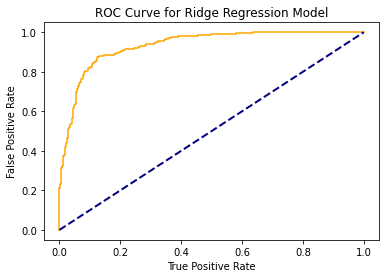

In [241]:
plt.plot(fpr, tpr, color = 'orange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve for Ridge Regression Model')